# PCA 실습 1. Iris dataset

</br>

## --▶ Dataset Load

In [10]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## --▶ Featrue 확인

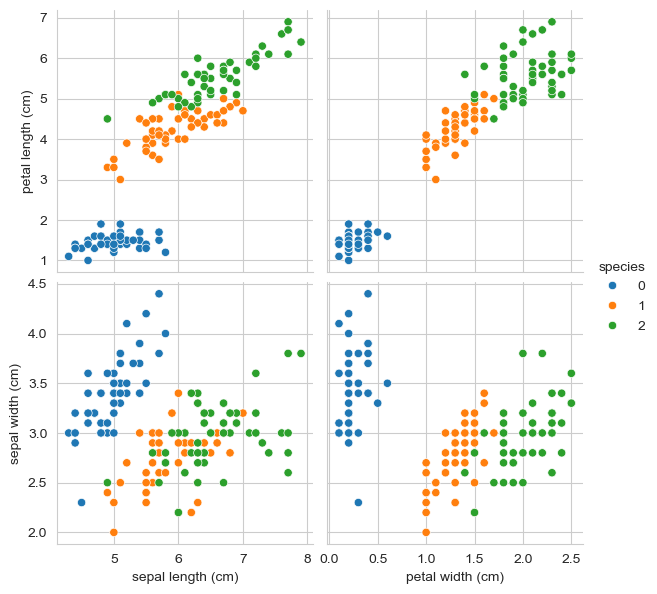

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

sns.set_style('whitegrid')


sns.pairplot(
	iris_df, hue='species', palette='tab10', height=3,
	x_vars=['sepal length (cm)', 'petal width (cm)'],
	y_vars=['petal length (cm)', 'sepal width (cm)']
);

## --▶ Scaler 적용

In [12]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

## --▶ PCA

- 4개의 특성을 2개의 특성으로 정리 <br></br>

#### ◾ `get_pca_data()`

- PCA 결과를 반환하는 함수

In [13]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [14]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [15]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [16]:
pca.components_ #--> 2개의 Vector에 각각 요소는 4개

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

#### ◾ get_pd_from_pca()

- PCA 결과를 Pandas.DataFrame으로 정리하는 함수

In [17]:
def get_pd_from_pca(pca_data, cols=['pca_component_1','pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [18]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


#### ◾ 주성분 확인

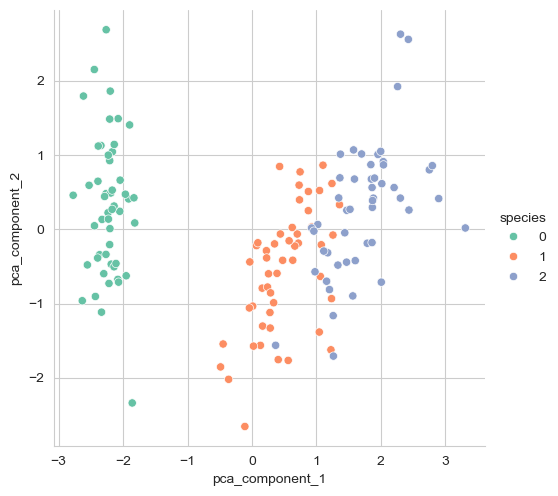

In [21]:
sns.pairplot(
	iris_pd_pca, hue='species', palette='Set2', height=5,
	x_vars=['pca_component_1'],
	y_vars=['pca_component_2']
);

## --▶ Modeling : Random Forest

### ◾ rf_scores()

- Random Forest Model을 K=5로 교차검정한 후 Accuracy Score를 반환하는 함수

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(n_estimators=100, random_state=13)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
    
    print('Score :', np.mean(scores_rf))


### 📍 Originer 4 Features

- 4개의 특성을 모두 사용해서 Random Forest 적용

In [25]:
rf_scores(iris_ss, iris.target)

Score : 0.96


### 📍 PCA 2 Features

- 주성분분석으로 얻은 2개의 특성을 사용해서 Random Forest 적용

In [26]:
pca_X = iris_pd_pca[['pca_component_1','pca_component_2']]

rf_scores(pca_X, iris.target)

Score : 0.9066666666666666
